In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from datetime import datetime
from datetime import timedelta 
import time 

In [5]:
import requests

In [18]:
transaction = pd.read_csv("/content/drive/My Drive/CNTMDT/0_Code_Dataset/BlockInformation/Transaction.csv", parse_dates=True, index_col=0)
transaction.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
Date,,,,,,,,,,
2020-03-12,1.354483e+07,1.655290e+13,1.242504e+08,12.241667,1.235117,653156.0,2317.735099,349978,0.376633,4970.788086
2020-03-13,8.634487e+06,1.655290e+13,1.028563e+08,14.216667,1.296698,517382.0,2214.384000,276798,0.313409,5563.707031
2020-03-14,8.986521e+06,1.655290e+13,1.053248e+08,13.766667,1.274480,413935.0,2186.156250,279828,0.768603,5200.366211
2020-03-15,8.103101e+06,1.655290e+13,9.791919e+07,12.683333,1.113645,532450.0,1875.882353,223230,1.172461,5392.314941
2020-03-16,7.889847e+06,1.655290e+13,9.791919e+07,12.950000,1.193453,540902.0,2272.260504,270399,0.431327,5014.479980


In [19]:
finance = pd.read_csv("/content/drive/My Drive/CNTMDT/0_Code_Dataset/Finance/1_Finance.csv", parse_dates=True, index_col=1)
finance = finance.drop('Unnamed: 0', axis=1)
finance.head(5)

,BTC_Close,Gold_Close,Oil_Close,Volume_Top2,Volume_Top3,Volume_Top4,Volume_Top5
Date,,,,,,,
2019-12-31,7193.599121,1519.500000,61.060001,0.156378,0.019541,0.423700,0.029984
2020-01-01,7200.174316,1519.500000,61.060001,0.157129,0.020616,0.425794,0.028833
2020-01-02,6985.470215,1524.500000,61.180000,0.144564,0.019533,0.435746,0.025786
2020-01-03,7344.884277,1549.199951,63.049999,0.139835,0.016951,0.432715,0.035293
2020-01-04,7410.656738,1549.199951,63.049999,0.147668,0.019859,0.428953,0.036992


In [20]:
df = finance.copy()

In [21]:
cols = transaction.columns
cols

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'], dtype='object')

In [22]:
for i in cols:
  df[i] = transaction[i]

In [ ]:
# df = df.merge(transaction, how="inner", on='Date')

In [10]:
# df = df.merge(transaction, how="inner", on='Date')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1168 entries, 2019-12-31 to 2023-03-12
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BTC_Close    1168 non-null   object 
 1   Gold_Close   1168 non-null   float64
 2   Oil_Close    1168 non-null   float64
 3   Volume_Top2  1168 non-null   float64
 4   Volume_Top3  1168 non-null   float64
 5   Volume_Top4  1168 non-null   float64
 6   Volume_Top5  1168 non-null   float64
 7   X1           1096 non-null   float64
 8   X2           1096 non-null   float64
 9   X3           1096 non-null   float64
 10  X4           1096 non-null   float64
 11  X5           1096 non-null   float64
 12  X6           1096 non-null   float64
 13  X7           1096 non-null   float64
 14  X8           1096 non-null   float64
 15  X9           1096 non-null   float64
 16  Y            1096 non-null   float64
dtypes: float64(16), object(1)
memory usage: 164.2+ KB


In [12]:
df.head(5)

,BTC_Close,Gold_Close,Oil_Close,Volume_Top2,Volume_Top3,Volume_Top4,Volume_Top5,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
Date,,,,,,,,,,,,,,,,,
2020-03-12,4970.788086,1589.300049,31.500000,0.138792,0.022247,0.467458,0.033028,1.354483e+07,1.655290e+13,1.242504e+08,12.241667,1.235117,653156.0,2317.735099,349978,0.376633,4970.788086
2020-03-13,5563.707031,1515.699951,31.730000,0.130252,0.024123,0.464246,0.034736,8.634487e+06,1.655290e+13,1.028563e+08,14.216667,1.296698,517382.0,2214.384000,276798,0.313409,5563.707031
2020-03-14,5200.366211,1515.699951,31.730000,0.123606,0.022415,0.468859,0.034364,8.986521e+06,1.655290e+13,1.053248e+08,13.766667,1.274480,413935.0,2186.156250,279828,0.768603,5200.366211
2020-03-15,5392.314941,1515.699951,31.730000,0.132685,0.022928,0.458431,0.031296,8.103101e+06,1.655290e+13,9.791919e+07,12.683333,1.113645,532450.0,1875.882353,223230,1.172461,5392.314941
2020-03-16,5014.47998,1485.900024,28.700001,0.127474,0.021105,0.457094,0.032533,7.889847e+06,1.655290e+13,9.791919e+07,12.950000,1.193453,540902.0,2272.260504,270399,0.431327,5014.479980


In [ ]:
# df = df.drop(["Date_New", "BTC_Close", "Y", "Price_New"] , axis = 1)

In [24]:
df = df.drop(["BTC_Close"] , axis = 1)

In [25]:
df.tail(5)

,Gold_Close,Oil_Close,Volume_Top2,Volume_Top3,Volume_Top4,Volume_Top5,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
Date,,,,,,,,,,,,,,,,
2023-03-08,1812.699951,76.660004,0.110229,0.484232,0.006751,0.050390,18928979.35,4.305380e+13,284649021.1,9.733333,1.980563,762121.0,2199.195489,292493.0,0.808553,21718.080078
2023-03-09,1829.300049,75.720001,0.110303,0.485785,0.005897,0.043884,19039458.64,4.305380e+13,288929457.5,9.916667,1.825582,721567.0,2495.214815,336854.0,1.310315,20363.021484
2023-03-10,1862.000000,76.680000,0.109557,0.477415,0.004834,0.065834,17894803.57,4.312710e+13,291564668.7,9.500000,1.836067,621363.0,2421.573529,329334.0,0.488828,20187.244141
2023-03-11,1862.000000,76.680000,0.108613,0.473552,0.003813,0.194276,21477230.28,4.355170e+13,357219695.9,8.000000,2.271631,725571.0,1937.618182,319707.0,0.462926,20632.410156
2023-03-12,1862.000000,76.680000,0.115223,0.486166,0.004848,0.099917,21186496.50,4.355170e+13,348559824.5,6.050000,2.356655,728811.0,1649.409938,265555.0,0.612848,22163.949219


In [26]:
df.isnull().sum().sum()

720

In [28]:
df = df.dropna()

In [30]:
df.to_csv("/content/drive/My Drive/CNTMDT/0_Code_Dataset/Dataset/Combination.csv")

In [31]:
# df.to_csv("Combination.csv")

In [ ]:
df = pd.read_csv("/content/drive/My Drive/CNTMDT/Code_Dataset/Dataset/Combination.csv", parse_dates=['Date'], index_col=1)
df = df.drop('Unnamed: 0', axis=1)
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Gold_Close,Oil_Close,Volume_Top2,Volume_Top3,Volume_Top4,Volume_Top5,Close
Date,,,,,,,,,,,,,,,,
2020-03-12,1.354483e+07,1.655292e+13,1.242504e+08,12.241667,1.235117,653156.0,2317.735099,349978.0,0.376633,1589.300049,31.500000,0.138792,0.022247,0.467458,0.033028,5563.707031
2020-03-16,7.889847e+06,1.655292e+13,9.791919e+07,12.950000,1.193453,532450.0,2272.260504,270399.0,0.431327,1485.900024,28.700001,0.127474,0.021105,0.457094,0.032533,5225.629395
2020-03-17,8.477517e+06,1.655292e+13,1.012106e+08,14.275000,1.231597,540902.0,2262.813008,278326.0,0.545866,1524.900024,26.950001,0.121335,0.000002,0.021426,0.469540,5238.438477
2020-03-18,6.941255e+06,1.655292e+13,8.228503e+07,14.908333,1.164993,476482.0,2312.540000,231254.0,0.638482,1477.300049,20.370001,0.115852,0.019591,0.457076,0.029756,6191.192871
2020-03-19,7.981376e+06,1.655292e+13,8.804498e+07,12.516667,1.306642,525607.0,2483.074766,265689.0,0.663386,1478.599976,25.219999,0.117731,0.018600,0.460078,0.037399,6198.778320


In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Gold_Close,Oil_Close,Volume_Top2,Volume_Top3,Volume_Top4,Volume_Top5,Close
Date,,,,,,,,,,,,,,,,
2020-03-12,1.354483e+07,1.655292e+13,1.242504e+08,12.241667,1.235117,653156.0,2317.735099,349978.0,0.376633,1589.300049,31.500000,0.138792,0.022247,0.467458,0.033028,5563.707031
2020-03-16,7.889847e+06,1.655292e+13,9.791919e+07,12.950000,1.193453,532450.0,2272.260504,270399.0,0.431327,1485.900024,28.700001,0.127474,0.021105,0.457094,0.032533,5225.629395
2020-03-17,8.477517e+06,1.655292e+13,1.012106e+08,14.275000,1.231597,540902.0,2262.813008,278326.0,0.545866,1524.900024,26.950001,0.121335,0.000002,0.021426,0.469540,5238.438477
2020-03-18,6.941255e+06,1.655292e+13,8.228503e+07,14.908333,1.164993,476482.0,2312.540000,231254.0,0.638482,1477.300049,20.370001,0.115852,0.019591,0.457076,0.029756,6191.192871
2020-03-19,7.981376e+06,1.655292e+13,8.804498e+07,12.516667,1.306642,525607.0,2483.074766,265689.0,0.663386,1478.599976,25.219999,0.117731,0.018600,0.460078,0.037399,6198.778320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-06,1.932075e+07,4.305384e+13,2.825088e+08,9.350000,1.809957,671836.0,2394.060606,316016.0,0.888592,1847.900024,80.459999,0.103529,0.488258,0.007385,0.058308,22219.769531
2023-03-07,2.361622e+07,4.305384e+13,3.531360e+08,7.716667,2.018769,771846.0,2194.436364,362082.0,0.699880,1813.900024,77.580002,0.105350,0.484172,0.005736,0.054828,21718.080078
2023-03-08,1.892898e+07,4.305384e+13,2.846490e+08,9.733333,1.980563,656385.0,2199.195489,292493.0,0.558608,1812.699951,76.660004,0.110229,0.484232,0.006751,0.050390,20363.021484


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 749
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         750 non-null    datetime64[ns]
 1   X1           750 non-null    float64       
 2   X2           750 non-null    float64       
 3   X3           750 non-null    float64       
 4   X4           750 non-null    float64       
 5   X5           750 non-null    float64       
 6   X6           750 non-null    float64       
 7   X7           750 non-null    float64       
 8   X8           750 non-null    float64       
 9   X9           750 non-null    float64       
 10  Gold_Close   750 non-null    float64       
 11  Oil_Close    750 non-null    float64       
 12  Volume_Top2  750 non-null    float64       
 13  Volume_Top3  750 non-null    float64       
 14  Volume_Top4  750 non-null    float64       
 15  Volume_Top5  750 non-null    float64       
 16  Close   

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [17]:
# Thư viện vẽ đồ thị
formatter = ticker.StrMethodFormatter('${x:,.0f}')

title = "BTC's Closing Price"
ylabel = 'USD'
xlabel = 'Date'

ax = df['Close'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

NameError: ignored

In [ ]:
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import ipywidgets as widgets
import seaborn as sns

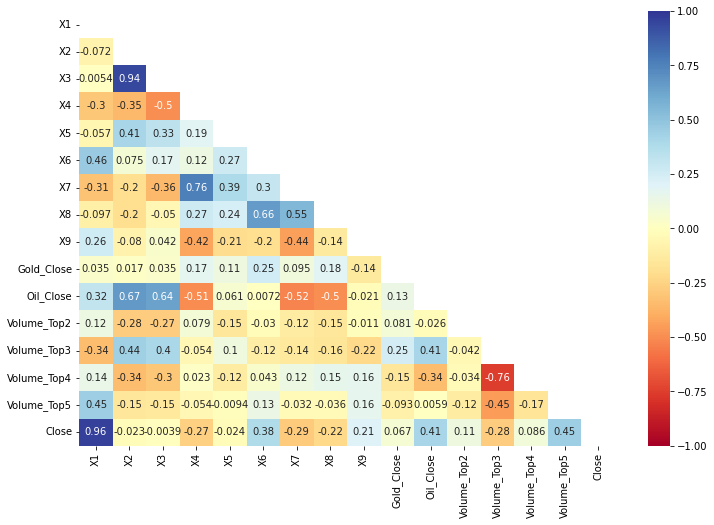

In [ ]:
corr=df.corr()# corr là ma trận đối xứng qua đường chéo 
mask = np.triu(np.ones_like(corr))# mask là ma trận True/False đối xứng qua đường chéo chính
plt.figure(figsize=(12,8))# Gán mask để plot ra 1/2 đồ thị 
# sns.heatmap(data=corr,mask=mask,cmap='RdYlBu',vmax=1,vmin=-1,annot=True,linecolor='black',linewidths=1)
ax = sns.heatmap(data=corr, mask=mask,cmap='RdYlBu', vmax=1,vmin=-1,annot=True)
plt.savefig('CORR1.png')

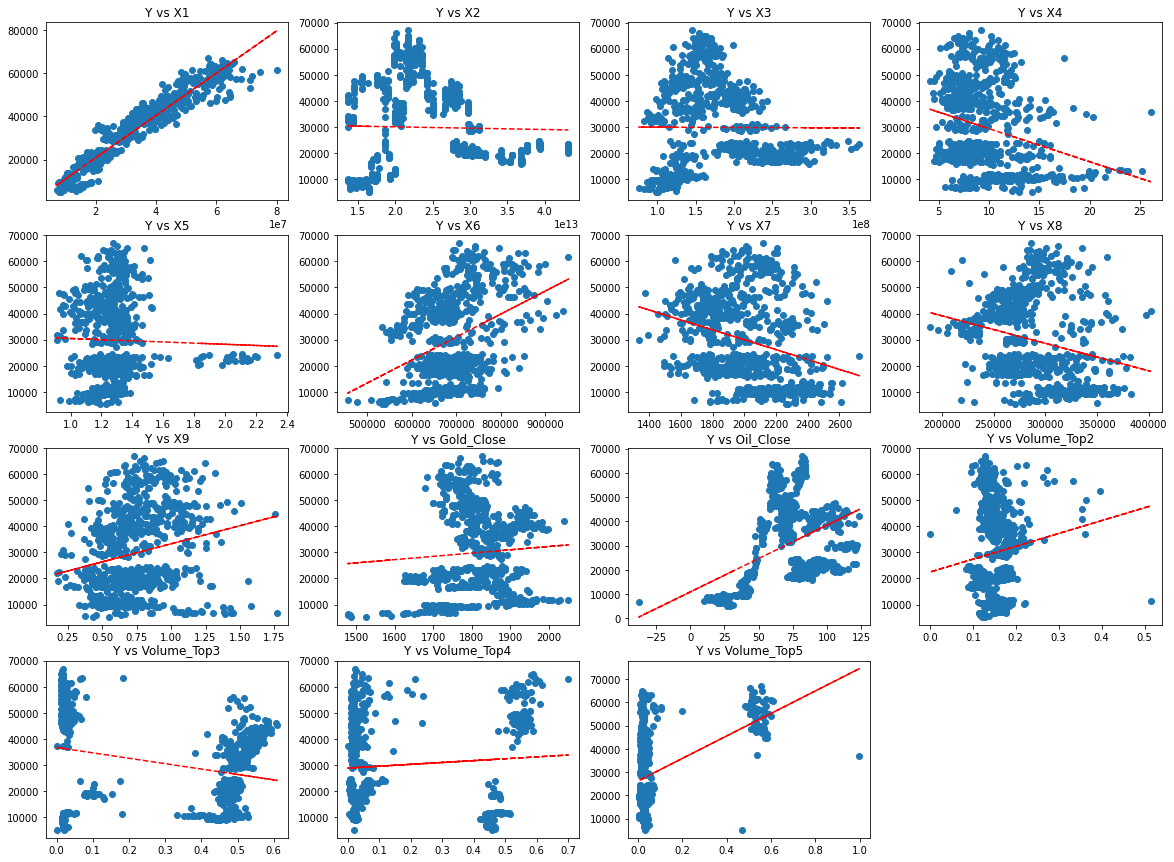

In [ ]:
plt.figure(figsize=(20,15))
cols = ['X1','X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', "Gold_Close", "Oil_Close", "Volume_Top2", "Volume_Top3", "Volume_Top4", "Volume_Top5"]
count = 1
for variable in cols:
  plt.subplot(4,4,count)
  x = df[variable]
  y = df['Close']
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  plt.scatter(x, y)
  plt.title("Y vs "+ variable)
  plt.plot(x,p(x),"r--")
  count = count + 1
# plt.savefig('CORR2.png')
plt.show()


<!-- <h1>Create empty lists to store the data -->

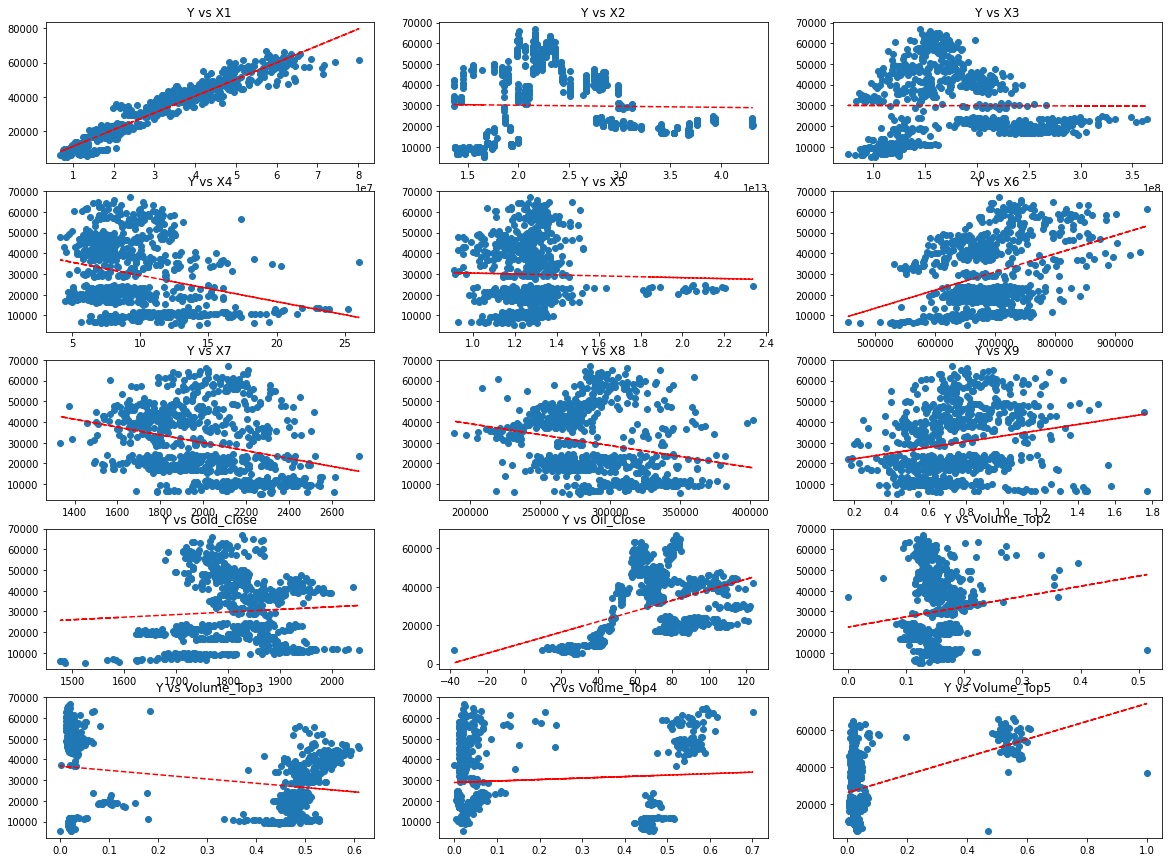

In [ ]:
plt.figure(figsize=(20,15))
cols = ['X1','X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', "Gold_Close", "Oil_Close", "Volume_Top2", "Volume_Top3", "Volume_Top4", "Volume_Top5"]
count = 1
for variable in cols:
  plt.subplot(5,3,count)
  x = df[variable]
  y = df['Close']
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  plt.scatter(x, y)
  plt.title("Y vs "+ variable)
  plt.plot(x,p(x),"r--")
  count = count + 1

plt.show()

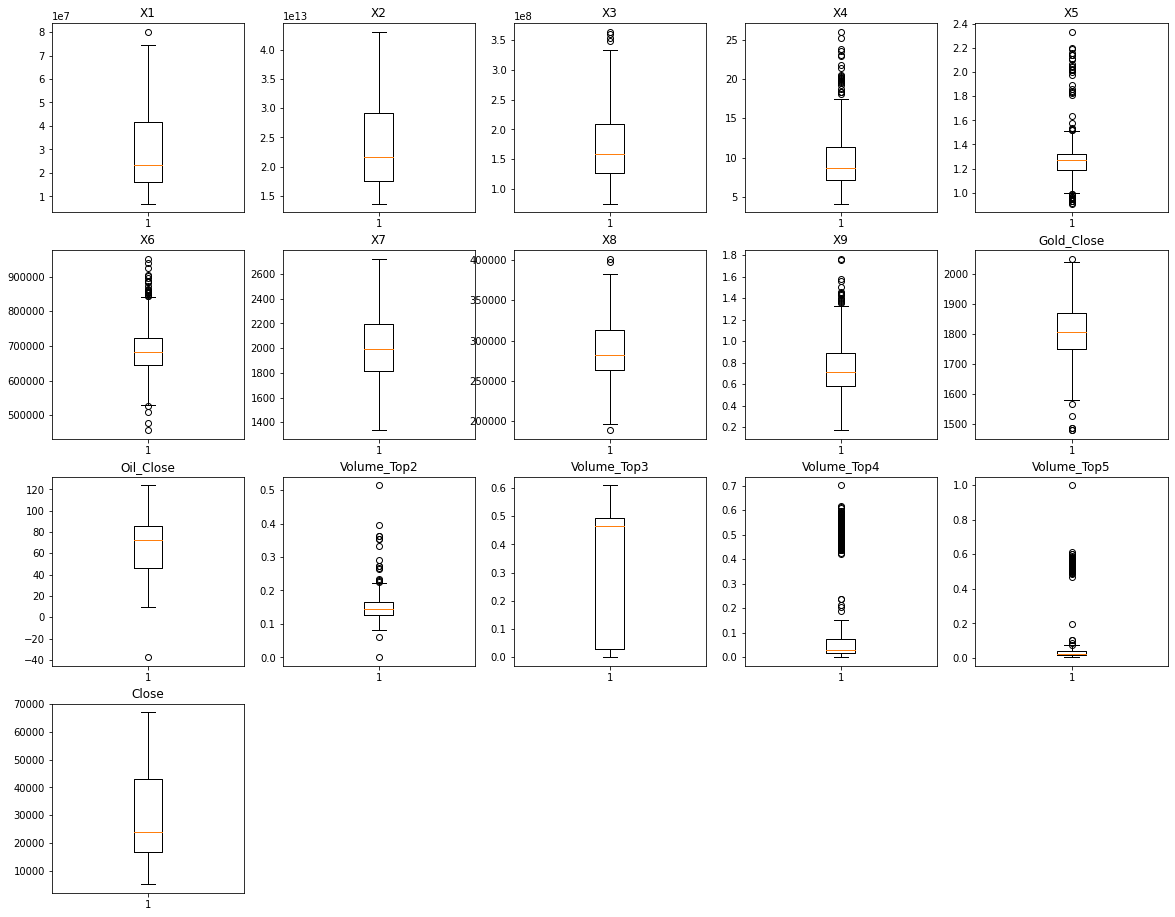

In [ ]:
plt.figure(figsize=(20,16))

col_dict = {'X1': 1, 'X2': 2, 'X3': 3, 'X4': 4, 'X5': 5, 'X6': 6, 'X7': 7, 'X8': 8, 'X9': 9, "Gold_Close": 10, "Oil_Close": 11, "Volume_Top2": 12, "Volume_Top3": 13, "Volume_Top4": 14, "Volume_Top5":15, 'Close': 16}
for variable,i in col_dict.items():
                     plt.subplot(4,5,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()